In [1]:
import sympy as s

P, t0, D, t, c = s.symbols("P, T_0, D, t, c")
theta = P/(s.pi*D)*s.sin(s.pi*(t-t0)/P)

In [2]:
theta = P/(s.pi*D)*s.sin(s.pi*(t-t0)/P)
theta

P*sin(pi*(-T_0 + t)/P)/(pi*D)

In [3]:
mu = -0.5 * s.tanh(c*(theta + 0.5)) + 0.5 * s.tanh(c*(theta - 0.5))
mu

0.5*tanh(c*(-0.5 + P*sin(pi*(-T_0 + t)/P)/(pi*D))) - 0.5*tanh(c*(0.5 + P*sin(pi*(-T_0 + t)/P)/(pi*D)))

In [4]:
mu_s = s.simplify(s.limit(mu, P, s.oo))
mu_s

-tanh(c*(D - 2*T_0 + 2*t)/(2*D))/2 - tanh(c*(D + 2*T_0 - 2*t)/(2*D))/2

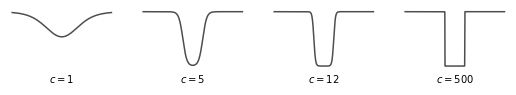

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, t0, D, c):
    return -0.5*np.tanh(c*(D-(2*t0)+(2*t))/(2*D)) - 0.5*np.tanh(c*(D+(2*t0)-(2*t))/(2*D))

cs = [1,5,12,500]
fig, axes = plt.subplots(1, len(cs), figsize=(9,1.5))
x = np.linspace(0, 1, 2000)

for i, ax in enumerate(axes):
    _t0 = x.mean()
    ax.plot(x, f(x, _t0, 0.2*x.max(), cs[i]), c="0.3")
    ax.axis("off")
    ax.text(_t0, -1.3, f"$c={{{cs[i]}}}$", ha='center')
    ax.set_ylim(-1.4, 0.1)

plt.savefig("../figures/protopapas.pdf")